<div style="border: 2px solid RGB(200,150,100);" >
<div style="display: flex; font-family: Verdana; background-color: RGB(200,150,200);" >
  <h1 style="margin: auto; padding: 20px; "> Projet: SEGMENTATION DES CLIENTS DU SITE OLIST ! </h1>
</div>

<h2 style="padding: 10px; font-family: Verdana; "> Exploratory Data Analysis and RFM Segmentation </h2>

### Sommaire
###  <a style="padding: 10px; font-family: Verdana; " href="#AF"> 1. Chargement, Analyse de la forme et fusion des fichiers</a>
###  <a style="padding: 10px; font-family: Verdana; " href="#F"> 2. Analyse du fond: Quelques tendances </a>
###  <a style="padding: 10px; font-family: Verdana; " href="#FA"> 3. Segmentation RFM </a>
</div>

In [1]:
!pip install missingno

### Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
import missingno as msno
%config IPCompleter.greedy=True  
%matplotlib inline

In [3]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="AF"> 1. Chargement, Analyse de la forme et fusion des fichiers </a></h3>
</div>

### Importation des fichiers au seins des DataFrames

In [4]:
geolocations = pd.read_csv("Dataolist/olist_geolocation_dataset.csv")
orders = pd.read_csv("Dataolist/olist_orders_dataset.csv")
products = pd.read_csv("Dataolist/olist_products_dataset.csv")
sellers = pd.read_csv("Dataolist/olist_sellers_dataset.csv")
reviews = pd.read_csv("Dataolist/olist_order_reviews_dataset.csv")
items = pd.read_csv("Dataolist/olist_order_items_dataset.csv")
customers = pd.read_csv("Dataolist/olist_customers_dataset.csv")
payments = pd.read_csv("Dataolist/olist_order_payments_dataset.csv")
category = pd.read_csv("Dataolist/product_category_name_translation.csv")

### Analyse de la forme des Dataframes
#### a) Geolocalisations

In [5]:
display(geolocations.head())
display(geolocations.dtypes)
display(geolocations.shape)
display(geolocations.isna().sum())
display(geolocations.nunique())
display(geolocations.describe())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

(1000163, 5)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02



**Observation:**

- On compte 1000163 localisations carracterises par le zip code, la latitude, la longitude, la ville et l'Etat associe ;
- Type variable attendu et conformes ;
- Aucune valeur manquante ;


In [6]:
# Detection des doublons 
geolocations.duplicated().sum()

261831

In [7]:
# Suppression des doublons 
geolocations = geolocations.drop_duplicates()

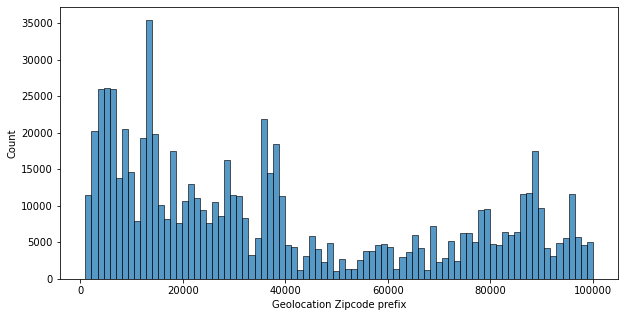

In [9]:
# Distribution de la variable zip code
plt.figure(figsize=(10, 5))
sns.histplot(geolocations['geolocation_zip_code_prefix'])
plt.xlabel('Geolocation Zipcode prefix')
plt.show()

C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


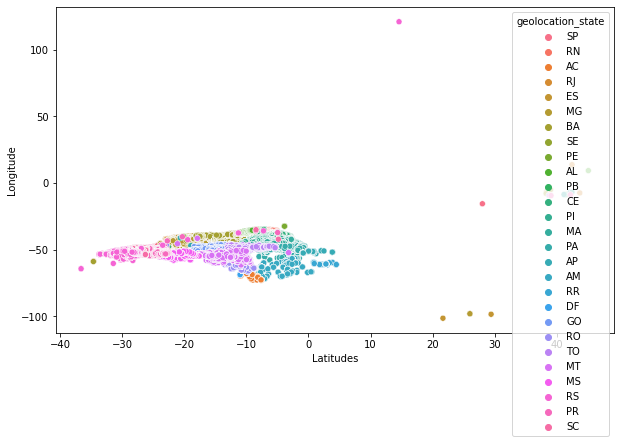

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geolocations,
                x='geolocation_lat',
                y='geolocation_lng', hue="geolocation_state",)
plt.xlabel('Latitudes')
plt.ylabel('Longitude')
plt.show()